<a href="https://colab.research.google.com/github/Pavitra-khare/DA6401_Deep_learning/blob/main/DL_Assignment1_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 3628-pavitrakhare (3628-pavitrakhare-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 3628-pavitrakhare (3628-pavitrakhare-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


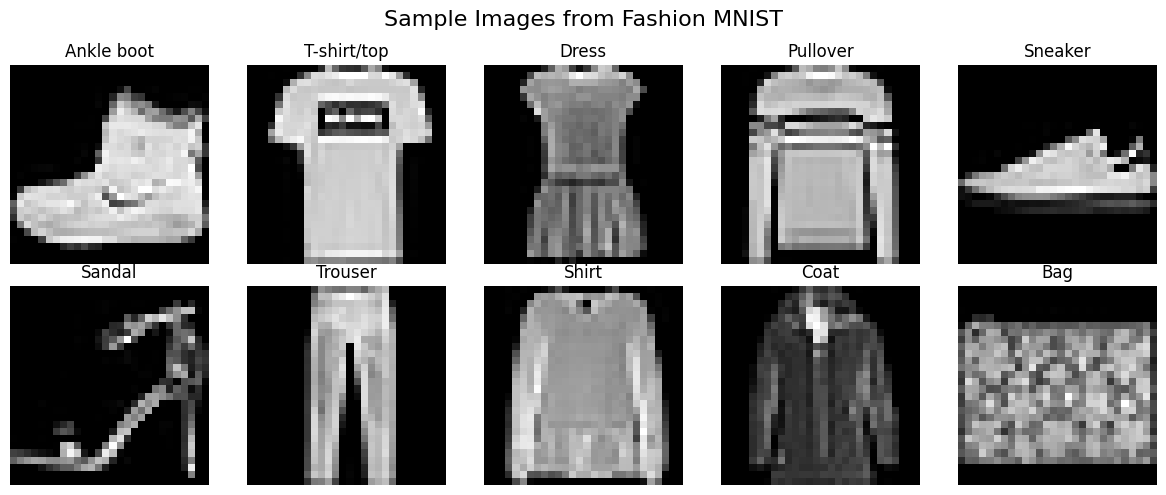

In [2]:
import os
import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Initialize Weights & Biases (W&B) for experiment tracking
wandb.init(project="DA6401_ASS-practice")

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for Fashion MNIST
def get_class_names():
    return [
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]

# Select one sample image for each class
def select_sample_images(images, labels, class_names):
    chosen_images = []
    seen_labels = set()
    for idx, lbl in enumerate(labels):
        if lbl not in seen_labels:
            chosen_images.append((images[idx], class_names[lbl]))
            seen_labels.add(lbl)
        if len(chosen_images) == len(class_names):
            break
    return chosen_images

# Plot sample images
def plot_sample_images(sample_images):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle("Sample Images from Fashion MNIST", fontsize=16)

    for ax, (image, label) in zip(axes.flatten(), sample_images):
        ax.imshow(image, cmap='gray')
        ax.set_title(label)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    return fig

# Main Execution
class_names = get_class_names()
sample_images = select_sample_images(train_images, train_labels, class_names)
fig = plot_sample_images(sample_images)

# Log the figure to W&B
wandb.log({"Sample MNIST Images": fig})
wandb.finish()

# ACTIVATION FUNCTION

In [19]:
import numpy as np

def sigmoid_activation(val):
    """Computes the sigmoid activation function."""
    return 1.0 / (1.0 + np.exp(-val))

def tanh_activation(val):
    """Computes the hyperbolic tangent (tanh) activation function."""
    return np.tanh(val)

def relu_activation(val):
    """Computes the ReLU (Rectified Linear Unit) activation function."""
    return np.maximum(0, val)

def softmax_activation(val):
    """Computes the softmax activation function with numerical stability."""
    shifted_val = val - np.max(val, axis=1, keepdims=True)
    exp_vals = np.exp(shifted_val)
    return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

def compute_cross_entropy(predicted, actual):
    """Computes the cross-entropy loss."""
    epsilon = 1e-9  # Avoid log(0) errors
    return -np.mean(np.sum(actual * np.log(predicted + epsilon), axis=1))

def compute_mse(predicted, actual):
    """Computes the mean squared error loss."""
    return np.mean((actual - predicted) ** 2)

def apply_activation(val, activation_type="sigmoid"):
    """Applies the selected activation function."""
    activation_map = {
        "relu": relu_activation,
        "sigmoid": sigmoid_activation,
        "tanh": tanh_activation,
        "softmax": softmax_activation
    }
    return activation_map.get(activation_type, lambda val: "error")(val)

def activation_gradient(val, activation_type="sigmoid"):
    """Computes the derivative of the selected activation function."""
    gradient_map = {
        "relu": lambda val: np.where(val > 0, 1, 0),
        "tanh": lambda val: 1.0 - np.tanh(val) ** 2,
        "sigmoid": lambda val: sigmoid_activation(val) * (1 - sigmoid_activation(val))
    }
    return gradient_map.get(activation_type, lambda val: "error")(val)


# Question-2 Forward Propogation

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 3628-pavitrakhare (3628-pavitrakhare-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [20]:
import os
import numpy as np
from keras.datasets import fashion_mnist
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import wandb

epochs_count = 10
batch_size = 30
loss_fn = 'cross_entropy'
optimizer_type = 'nadam'
learning_rate = 1e-3
dataset_choice = 'fashion_mnist'

momentum_beta = 0.9
rmsprop_decay = 0.9
adam_beta1 = 0.9
adam_beta2 = 0.999
epsilon_value = 1e-3
weight_decay = 0
weight_init = 'Xavier'
num_hidden_layers = 3
hidden_layer_units = 128
activation_fn = 'relu'

# Constants
LAYER_INPUT = 'input_dim'
LAYER_OUTPUT = 'output_dim'
ACTIVATION_TYPE = "activation"


In [27]:
import numpy as np
from keras.datasets import fashion_mnist, mnist
from sklearn.model_selection import train_test_split

def one_hot_encode(labels):

    num_samples = len(labels)
    num_classes = max(labels) + 1
    encoded_matrix = np.zeros((num_samples, num_classes))

    for idx, label in enumerate(labels):
        encoded_matrix[idx][label] = 1

    return encoded_matrix

# Load the dataset based on the selected option
# if dataset_choice == 'fashion_mnist':
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# elif dataset_choice == 'mnist':
#     (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# else:
#     raise ValueError("Invalid dataset choice! Choose 'fashion_mnist' or 'mnist'.")

# Normalize pixel values to range [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels_needed, test_labels_needed = train_labels, test_labels

# Split dataset into training and validation sets
train_features, val_features, train_targets, val_targets = train_test_split(train_images, train_labels, test_size=0.1, random_state=40)

# Reshape images into 1D feature vectors
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_images.reshape(test_images.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

# Adjust dataset size to be multiples of batch_size
batch_multiple = 128
train_features, test_features, val_features = (arr[:(len(arr) // batch_multiple) * batch_multiple] for arr in [train_features, test_features, val_features])
train_targets, test_labels, val_targets = (arr[:(len(arr) // batch_multiple) * batch_multiple] for arr in [train_targets, test_labels, val_targets])

# Convert class labels into one-hot encoded format
train_targets = one_hot_encode(train_targets)
test_targets = one_hot_encode(test_labels)
vali_targets = one_hot_encode(val_targets)

# Determine input and output layer sizes
input_dim = train_features.shape[1]
output_dim = train_targets.shape[1]


In [22]:
def init_weights_biases(network_structure, num_hidden_layers=1, initialization_method='random'):
    """
    Initializes weight matrices and bias vectors for each layer in the neural network.

    Parameters:
    - network_structure: List containing dictionaries with input/output dimensions.
    - num_hidden_layers: Number of hidden layers in the network.
    - initialization_method: Method for weight initialization ('random' or 'Xavier').

    Returns:
    - weight_params: Dictionary containing weight matrices for each layer.
    - bias_params: Dictionary containing bias vectors for each layer.
    """

    weight_params, bias_params = {}, {}
    for layer_idx in range(num_hidden_layers + 1):
        input_dim = network_structure[layer_idx]["input_dim"]
        output_dim = network_structure[layer_idx]["output_dim"]

        if initialization_method == 'random':
            weight_params[f'W{layer_idx+1}'] = np.random.normal(0, 0.5, (output_dim, input_dim))
            bias_params[f'b{layer_idx+1}'] = np.random.normal(0, 0.5, (output_dim, 1))
        else:  # Xavier Initialization
            limit_range = np.sqrt(6 / (input_dim + output_dim))
            weight_params[f'W{layer_idx+1}'] = np.random.uniform(-limit_range, limit_range, (output_dim, input_dim))
            bias_params[f'b{layer_idx+1}'] = np.random.uniform(-limit_range, limit_range, (output_dim, 1))

    return weight_params, bias_params


In [23]:
def compute_train_accuracy(actual_batches, predicted_batches, total_samples):
    """
    Computes training accuracy by comparing predicted labels with actual labels.

    Parameters:
    - actual_batches: List of actual labels in batches (one-hot encoded).
    - predicted_batches: List of predicted probability distributions.
    - total_samples: Total number of training samples.

    Returns:
    - Training accuracy as a fraction.
    """

    match_count = sum(
        np.argmax(actual_sample) == np.argmax(predicted_sample)
        for batch_actual, batch_pred in zip(actual_batches, predicted_batches)
        for actual_sample, predicted_sample in zip(batch_actual, batch_pred)
    )

    return match_count / total_samples



In [8]:
def test_accuracy(testX, testy, weights, biases, number_hidden_layers, activation_function, output_function):

    _, activations = propagate_forward(testX, weights, biases, number_hidden_layers, activation_function, output_function)
    y_pred = activations[-1]  # Get final layer activations
    y_predicted = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

    # Convert testy to class indices if one-hot encoded
    if testy.ndim > 1 and testy.shape[1] > 1:
        testy = np.argmax(testy, axis=1)

    # Ensure both lists are of the same length
    min_len = min(len(y_predicted), len(testy))
    return np.mean(y_predicted[:min_len] == testy[:min_len])


In [9]:
def calculate_regularizing_term(y, weight_decay_const, number_hidden_layers, weights):

    total_weight_sum = sum(np.sum(weight ** 2) for weight in weights)
    return (weight_decay_const / (2 * len(y))) * total_weight_sum


In [24]:
def propagate_forward(data_input, weights, biases, num_hidden_layers, activation_type, output_type):
    """
    Performs forward propagation through the neural network.

    Parameters:
    - data_input: Input feature matrix.
    - weights: List of weight matrices for each layer.
    - biases: List of bias vectors for each layer.
    - num_hidden_layers: Number of hidden layers in the network.
    - activation_type: Activation function for hidden layers.
    - output_type: Activation function for the output layer.

    Returns:
    - activations: List of pre-activation values for each layer.
    - outputs: List of activated values for each layer.
    """

    activations, outputs = [], []

    # Reshape input if necessary
    data_input = data_input.reshape(len(data_input), -1)

    # Compute activations for first hidden layer
    first_layer_activation = np.dot(weights[0], data_input.T) + biases[0]
    activations.append(first_layer_activation)
    outputs.append(apply_activation(first_layer_activation, activation_type))

    # Forward propagate through hidden layers
    for layer in range(1, num_hidden_layers):
        layer_act = np.dot(weights[layer], outputs[layer - 1]) + biases[layer]
        activations.append(layer_act)
        outputs.append(apply_activation(layer_act, activation_type))

    # Compute activations for the output layer
    final_activation = np.dot(weights[num_hidden_layers], outputs[-1]) + biases[num_hidden_layers]
    network_output = apply_activation(final_activation.T, output_type).T
    activations.append(final_activation)
    outputs.append(network_output)

    # Transpose activations for consistency
    activations = [act.T for act in activations]
    outputs = [out.T for out in outputs]

    return activations, outputs





In [11]:
def val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function):



    # Perform forward propagation
    _, h = propagate_forward(valX, weights, biases, number_hidden_layers, activation_function, output_function)

    # Retrieve the predicted values
    y_pred = h[-1]

    # Compute loss based on the chosen function
    if loss_function == 'cross_entropy':
        error = compute_cross_entropy(y_pred, valy)
    elif loss_function == 'mean_squared_error':
        error = compute_mse(y_pred, valy)
    else:
        raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")

    return error


In [25]:
import numpy as np

def backward_propagation(batch_trainy, batch_trainX, y_hat, activations, hidden_states, weights, num_hidden_layers, derivative_function='sigmoid'):


    weight_gradients, bias_gradients, activation_gradients, hidden_gradients = {}, {}, {}, {}

    # Reshape batch_trainy to ensure correct dimensions
    batch_trainy = batch_trainy.reshape(batch_trainy.shape[0], batch_trainy.shape[1])
    wdc=0

    epsilon = 1e-8  # Small value to prevent division errors
    last_activation_key = f'a{num_hidden_layers + 1}'
    last_hidden_key = f'h{num_hidden_layers + 1}'

    activation_gradients[last_activation_key] = -(batch_trainy - y_hat)
    hidden_gradients[last_hidden_key] = -(batch_trainy / (y_hat + epsilon))

    num_samples = len(batch_trainX)

    # Backpropagation from output layer to first hidden layer
    for layer in range(num_hidden_layers + 1, 1, -1):
        weight_key = f'W{layer}'
        bias_key = f'b{layer}'
        activation_key = f'a{layer}'
        prev_activation_key = f'a{layer - 1}'
        prev_hidden_key = f'h{layer - 1}'

        # Compute weight gradient
        weight_gradients[weight_key] = np.dot(activation_gradients[activation_key].T, hidden_states[layer - 2])

        # Apply L2 regularization
        weight_gradients[weight_key] += (wdc * weights[layer - 1])
        weight_gradients[weight_key] /= num_samples

        # Compute bias gradient
        bias_gradients[bias_key] = activation_gradients[activation_key]

        # Compute hidden gradients and activation gradients
        hidden_gradients[prev_hidden_key] = np.dot(weights[layer - 1].T, activation_gradients[activation_key].T)
        activation_gradients[prev_activation_key] = np.multiply(hidden_gradients[prev_hidden_key], activation_gradient(activations[layer - 2].T, derivative_function))
        activation_gradients[prev_activation_key] = activation_gradients[prev_activation_key].T

    # Compute gradients for the first layer (no hidden gradients needed)
    weight_gradients['W1'] = np.dot(activation_gradients['a1'].T, batch_trainX)
    bias_gradients['b1'] = activation_gradients['a1']

    # Normalize biases across samples
    for layer in range(1, len(bias_gradients) + 1):
        bias_key = f'b{layer}'
        bias_gradients[bias_key] = np.mean(bias_gradients[bias_key], axis=0).reshape(-1, 1)

    return weight_gradients, bias_gradients


In [26]:
import numpy as np

def gradient_descent(trainX, trainy, num_hidden_layers=1, hidden_layer_size=4, learning_rate=0.1, init_weights='random',
                     activation_func='sigmoid', num_epochs=1, output_func='softmax', batch_size=4,
                     loss_func='cross_entropy', weight_decay=0, wandb_flag=False):
    """
    Implements gradient descent for a neural network with variable layers.

    Parameters:
        trainX : np.array
            Input training data
        trainy : np.array
            Target labels
        num_hidden_layers : int, optional
            Number of hidden layers in the network (default is 1)
        hidden_layer_size : int, optional
            Number of neurons in each hidden layer (default is 4)
        learning_rate : float, optional
            Learning rate for weight updates (default is 0.1)
        init_weights : str, optional
            Initialization method for weights (default is 'random')
        activation_func : str, optional
            Activation function for hidden layers (default is 'sigmoid')
        num_epochs : int, optional
            Number of epochs for training (default is 1)
        output_func : str, optional
            Activation function for output layer (default is 'softmax')
        batch_size : int, optional
            Mini-batch size (default is 4)
        loss_func : str, optional
            Loss function ('cross_entropy' or 'mean_squared_error') (default is 'cross_entropy')
        weight_decay : float, optional
            Regularization term (default is 0)
        wandb_flag : bool, optional
            Whether to log metrics using Weights & Biases (default is False)

    Returns:
        tuple: Final activations, trained weights, biases, and metric history.
    """

    # Define network architecture
    layers = [
        {LAYER_INPUT: input_dim, LAYER_OUTPUT: hidden_layer_size, ACTIVATION_TYPE: activation_func}
    ]
    for _ in range(num_hidden_layers - 1):
        layers.append({LAYER_INPUT: hidden_layer_size, LAYER_OUTPUT: hidden_layer_size, ACTIVATION_TYPE: activation_func})
    layers.append({LAYER_INPUT: hidden_layer_size, LAYER_OUTPUT: output_dim, ACTIVATION_TYPE: output_func})

    # Initialize parameters
    weights, biases = init_weights_biases(layers, num_hidden_layers, init_weights)
    num_samples = len(trainX)
    num_batches = num_samples // batch_size

    # Mini-batch splitting
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Metrics tracking
    train_loss_history, val_loss_history, train_acc_history, val_acc_history = [], [], [], []
    final_output = None

    for epoch in range(num_epochs):
        total_train_loss = 0
        predicted_labels = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            activations, hidden_outputs = propagate_forward(batch_X, weights, biases, num_hidden_layers, activation_func, output_func)
            predicted_labels.append(hidden_outputs[-1])

            # Compute loss
            if loss_func == 'cross_entropy':
                batch_loss = compute_cross_entropy(hidden_outputs[-1], batch_y)
            elif loss_func == 'mean_squared_error':
                batch_loss = compute_mse(hidden_outputs[-1], batch_y)
            else:
                raise ValueError("Unsupported loss function")

            total_train_loss += batch_loss

            # Backpropagation
            weight_gradients, bias_gradients = backward_propagation(batch_y, batch_X, hidden_outputs[-1], activations, hidden_outputs, weights, num_hidden_layers, activation_func)

            # Update parameters
            for i in range(len(weights)):
                weights[i] -= learning_rate * weight_gradients[f'W{i+1}']
                biases[i] -= learning_rate * bias_gradients[f'b{i+1}']

        # Compute regularization term
        reg_term_train = calculate_regularizing_term(trainy, weight_decay, num_hidden_layers, weights)
        avg_train_loss = total_train_loss / num_batches + reg_term_train

        # Compute validation loss and accuracy
        val_loss = val_loss(val_features, val_targets, weights, biases, num_hidden_layers, activation_func, output_func, loss_func)
        reg_term_val = calculate_regularizing_term(val_features, weight_decay, num_hidden_layers, weights)
        val_loss += reg_term_val

        print(f"Epoch {epoch + 1} | Validation Loss: {val_loss:.4f}")

        # Store metrics
        train_loss_history.append(avg_train_loss)
        val_loss_history.append(val_loss)
        train_acc = compute_train_accuracy(mini_batches_y, predicted_labels, trainy)
        val_acc = test_accuracy(val_features, val_targets, weights, biases, num_hidden_layers, activation_func, output_func)
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        # Log metrics (if enabled)
        if wandb_flag:
            wandb.log({
                "loss": avg_train_loss,
                "val_loss": val_loss,
                "accuracy": train_acc,
                "val_accuracy": val_acc,
                "epoch": epoch + 1
            })

    return hidden_outputs[-1], weights, biases, [train_loss_history, val_loss_history, train_acc_history, val_acc_history]




In [14]:
def momentum_based_gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random', activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4, loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False, m_beta=0.9):

    # Define layer configurations
    layers = []
    input_layer = {'input_size': trainX.shape[1], 'output_size': hidden_layer_size, 'activation': activation_function}
    layers.append(input_layer)

    for _ in range(number_hidden_layers - 1):
        hidden_layer = {'input_size': hidden_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}
        layers.append(hidden_layer)

    output_layer = {'input_size': hidden_layer_size, 'output_size': trainy.shape[1], 'activation': output_function}
    layers.append(output_layer)

    # Initialize weights and biases
    weights, biases = init_weights_biases(layers,number_hidden_layers, initial_weights)

    # Split data into mini-batches
    num_batches = len(trainX) // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Initialize momentum terms
    momentum_weights = [np.zeros_like(w) for w in weights]
    momentum_biases = [np.zeros_like(b) for b in biases]

    # Lists to store training and validation metrics
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    # Training loop
    for epoch in range(epochs):
        epoch_loss = 0
        predictions = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            # Forward propagation
            activations, hidden_states = propagate_forward(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            predictions.append(hidden_states[-1])

            # Compute loss
            if loss_function == 'cross_entropy':
                batch_loss = compute_cross_entropy(hidden_states[-1], batch_y)
            elif loss_function == 'mean_squared_error':
                batch_loss = compute_mse(hidden_states[-1], batch_y)
            else:
                raise ValueError("Unsupported loss function")

            epoch_loss += batch_loss

            # Backward propagation
            grad_weights, grad_biases = backward_propagation(batch_y, batch_X, hidden_states[-1], activations, hidden_states, weights, number_hidden_layers, activation_function)

            # Update weights and biases with momentum
            for i in range(len(weights)):
                # Access gradients using keys (e.g., 'W1', 'b1', 'W2', 'b2', etc.)
                keyW = 'W' + str(i + 1)
                keyB = 'b' + str(i + 1)

                # Momentum update for weights
                momentum_weights[i] = momentum_weights[i] * m_beta + grad_weights[keyW] * eta
                weights[i] -= momentum_weights[i]

                # Momentum update for biases
                momentum_biases[i] = momentum_biases[i] * m_beta + grad_biases[keyB] * eta
                biases[i] -= momentum_biases[i]

        # Calculate training accuracy and loss
        train_acc = compute_train_accuracy(mini_batches_y,predictions,trainy)
        reg_term_train = calculate_regularizing_term(trainy,weight_decay_const,number_hidden_layers ,weights)
        avg_train_loss = epoch_loss / num_batches + reg_term_train

        # Calculate validation accuracy and loss
        val_acc = test_accuracy(val_features, vali_targets, weights, biases, number_hidden_layers, activation_function, output_function)
        val_loss_value = val_loss(val_features, vali_targets, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_term_val = calculate_regularizing_term(vali_targets,weight_decay_const ,number_hidden_layers, weights)
        val_loss_value += reg_term_val

        # Store metrics
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss_value)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        # Log metrics if wandb is enabled
        if wandb_flag:
            wandb.log({
                "loss": avg_train_loss,
                "val_loss": val_loss_value,
                "accuracy": train_acc,
                "val_accuracy": val_acc,
                "epoch": epoch
            })

        print(f"Epoch: {epoch + 1}, Validation Loss: {val_loss_value}")

    # Return final predictions, weights, biases, and metrics
    return hidden_states[-1], weights, biases, [train_losses, val_losses, train_accuracies, val_accuracies]

def nestrov_accelerated_gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1,
                                         initial_weights='random', activation_function='sigmoid', epochs=1,
                                         output_function='softmax', mini_batch_size=4, loss_function='cross_entropy',
                                         weight_decay_const=0, wandb_flag=False):
    """
    Implements Nesterov Accelerated Gradient Descent (NAG) for neural network optimization.
    """
    layers = [
        {LAYER_INPUT: input_dim, LAYER_OUTPUT: hidden_layer_size, ACTIVATION_TYPE: activation_function}
    ]
    for _ in range(num_hidden_layers - 1):
        layers.append({LAYER_INPUT: hidden_layer_size, LAYER_OUTPUT: hidden_layer_size, ACTIVATION_TYPE: activation_function})
    layers.append({LAYER_INPUT: hidden_layer_size, LAYER_OUTPUT: output_dim, ACTIVATION_TYPE: output_function})

    # Initialize parameters
    weights, biases = init_weights_biases(layers, num_hidden_layers, initial_weights)

    # Determine batch processing details
    num_samples = len(trainX)
    num_batches = num_samples // mini_batch_size
    mini_batches_X = np.array_split(trainX, num_batches)
    mini_batches_y = np.array_split(trainy, num_batches)

    # Initialize past gradients for momentum update
    momentum_weights = [np.zeros_like(w) for w in weights]
    momentum_biases = [np.zeros_like(b) for b in biases]

    # Lists to track training progress
    loss_train, loss_val, acc_train, acc_val = [], [], [], []

    for epoch in range(epochs):
        total_loss = 0
        y_predictions = []

        for batch_X, batch_y in zip(mini_batches_X, mini_batches_y):
            # Compute lookahead weights and biases
            lookahead_W = [weights[i] - (momentum_beta * momentum_weights[i]) for i in range(len(weights))]
            lookahead_B = [biases[i] - (momentum_beta * momentum_biases[i]) for i in range(len(biases))]

            activations, h_states = propagate_forward(batch_X, lookahead_W, lookahead_B, number_hidden_layers, activation_function, output_function)
            y_predictions.append(h_states[-1])

            # Compute loss
            total_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Compute gradients
            grad_W, grad_B = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, lookahead_W, number_hidden_layers, activation_function)

            # Apply Nesterov update
            for i in range(len(weights)):
                momentum_weights[i] = (m_beta * momentum_weights[i]) + (eta * grad_W[f'W{i+1}'])
                momentum_biases[i] = (m_beta * momentum_biases[i]) + (eta * grad_B[f'b{i+1}'])

                weights[i] -= momentum_weights[i]
                biases[i] -= momentum_biases[i]

        # Compute regularized loss
        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        avg_train_loss = (total_loss / num_batches) + reg_term_train

        # Validation loss calculation
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        # Compute accuracy metrics
        train_acc = train_accuracy(mini_batches_y, y_predictions, trainy)
        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)

        # Store metrics
        loss_train.append(avg_train_loss)
        loss_val.append(val_loss_value)
        acc_train.append(train_acc)
        acc_val.append(val_acc)

        # Log metrics if W&B logging is enabled
        if wandb_flag:
            wandb.log({"loss": avg_train_loss, "val_loss": val_loss_value, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch + 1})

    return h_states[-1], weights, biases, [loss_train, loss_val, acc_train, acc_val]

def rmsprop(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
            activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
            loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    layers = [{'input_size': input_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}]
    layers += [{'input_size': hidden_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}
               for _ in range(number_hidden_layers - 1)]
    layers.append({'input_size': hidden_layer_size, 'output_size': output_layer_size, 'activation': output_function})

    # Initialize weights & biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)
    num_batches = len(trainX) // mini_batch_size
    mini_batches = list(zip(np.array_split(trainX, num_batches), np.array_split(trainy, num_batches)))

    # RMSProp accumulators
    v_weights = [np.zeros_like(w) for w in weights]
    v_biases = [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    for epoch in range(epochs):
        epoch_loss = 0
        y_preds = []

        for batch_X, batch_y in mini_batches:
            activations, h_states = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(h_states[-1])

            # Compute loss
            epoch_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Backpropagation
            del_W, del_b = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, weights, number_hidden_layers, activation_function)

            # RMSProp weight update
            for i in range(len(weights)):
                v_weights[i] = rmsprop_beta * v_weights[i] + (1 - rmsprop_beta) * (del_W[f'W{i+1}'] ** 2)
                v_biases[i] = rmsprop_beta * v_biases[i] + (1 - rmsprop_beta) * (del_b[f'b{i+1}'] ** 2)

                weights[i] -= eta * del_W[f'W{i+1}'] / (np.sqrt(v_weights[i] + epsilon_))
                biases[i] -= eta * del_b[f'b{i+1}'] / (np.sqrt(v_biases[i] + epsilon_))

        # Compute loss & accuracy
        train_loss = (epoch_loss / num_batches) + calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch+1}: Validation Loss = {val_loss_value:.4f}")

        # Accuracy Calculation
        train_acc_list.append(train_accuracy(mini_batches, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss_value)

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc_list[-1], "val_accuracy": val_acc_list[-1], "epoch": epoch+1})

    return h_states[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]


def adam(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
         activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
         loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    layers = [{'input_size': input_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}]
    layers += [{'input_size': hidden_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}
               for _ in range(number_hidden_layers - 1)]
    layers.append({'input_size': hidden_layer_size, 'output_size': output_layer_size, 'activation': output_function})

    # Initialize parameters
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)
    num_batches = len(trainX) // mini_batch_size
    mini_batches = list(zip(np.array_split(trainX, num_batches), np.array_split(trainy, num_batches)))

    # Adam accumulators
    v_weights, v_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]
    m_weights, m_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    time_step = 0

    for epoch in range(epochs):
        epoch_loss = 0
        y_preds = []

        for batch_X, batch_y in mini_batches:
            time_step += 1
            activations, h_states = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(h_states[-1])

            # Compute loss
            epoch_loss += cross_entropy(h_states[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h_states[-1], batch_y)

            # Backpropagation
            del_W, del_b = backward_propagation(batch_y, batch_X, h_states[-1], activations, h_states, weights, number_hidden_layers, activation_function)

            # Adam weight update
            for i in range(len(weights)):
                m_weights[i] = beta_1 * m_weights[i] + (1 - beta_1) * del_W[f'W{i+1}']
                m_biases[i] = beta_1 * m_biases[i] + (1 - beta_1) * del_b[f'b{i+1}']

                v_weights[i] = beta_2 * v_weights[i] + (1 - beta_2) * (del_W[f'W{i+1}'] ** 2)
                v_biases[i] = beta_2 * v_biases[i] + (1 - beta_2) * (del_b[f'b{i+1}'] ** 2)

                # Bias correction
                m_hat_w, v_hat_w = m_weights[i] / (1 - beta_1 ** time_step), v_weights[i] / (1 - beta_2 ** time_step)
                m_hat_b, v_hat_b = m_biases[i] / (1 - beta_1 ** time_step), v_biases[i] / (1 - beta_2 ** time_step)

                weights[i] -= eta * m_hat_w / (np.sqrt(v_hat_w) + epsilon_)
                biases[i] -= eta * m_hat_b / (np.sqrt(v_hat_b) + epsilon_)

        # Compute loss & accuracy
        train_loss = (epoch_loss / num_batches) + calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch+1}: Validation Loss = {val_loss_value:.4f}")

        # Store accuracy
        train_acc_list.append(train_accuracy(mini_batches, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc_list[-1], "val_accuracy": val_acc_list[-1], "epoch": epoch+1})

    return h_states[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]

def nadam(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
          activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
          loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):

    # Define network layers dynamically
    layers = [{'input_size': input_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}]
    layers += [{'input_size': hidden_layer_size, 'output_size': hidden_layer_size, 'activation': activation_function}
               for _ in range(number_hidden_layers - 1)]
    layers.append({'input_size': hidden_layer_size, 'output_size': output_layer_size, 'activation': output_function})

    # Initialize model parameters
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)
    num_batches = len(trainX) // mini_batch_size
    mini_batches = list(zip(np.array_split(trainX, num_batches), np.array_split(trainy, num_batches)))

    # Initialize moving averages for Nadam
    v_weights, v_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]
    m_weights, m_biases = [np.zeros_like(w) for w in weights], [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    beta_1, beta_2, epsilon = 0.9, 0.999, 1e-3
    t = 0  # Step counter

    for epoch in range(epochs):
        total_train_loss = 0
        y_preds = []

        for X_batch, y_batch in mini_batches:
            t += 1  # Increment time step

            # Compute bias-corrected moving averages
            v_hat_weights = [v / (1 - beta_2 ** t) for v in v_weights]
            v_hat_biases = [v / (1 - beta_2 ** t) for v in v_biases]

            m_hat_weights = [m / (1 - beta_1 ** t) for m in m_weights]
            m_hat_biases = [m / (1 - beta_1 ** t) for m in m_biases]

            # Compute "lookahead" weights & biases
            lookahead_weights = [weights[i] - (m_hat_weights[i] / np.sqrt(v_hat_weights[i] + epsilon)) * eta
                                 for i in range(len(weights))]
            lookahead_biases = [biases[i] - (m_hat_biases[i] / np.sqrt(v_hat_biases[i] + epsilon)) * eta
                                for i in range(len(biases))]

            # Forward propagation
            activations, outputs = forward_propagation(X_batch, lookahead_weights, lookahead_biases, number_hidden_layers, activation_function, output_function)
            y_preds.append(outputs[-1])

            # Compute loss
            loss_func = cross_entropy if loss_function == 'cross_entropy' else mean_squared_error
            total_train_loss += loss_func(outputs[-1], y_batch)

            # Backpropagation
            grad_W, grad_B = backward_propagation(y_batch, X_batch, outputs[-1], activations, outputs, lookahead_weights, number_hidden_layers, activation_function)

            # Update moving averages & apply Nadam update rule
            for i in range(len(weights)):
                v_weights[i] = beta_2 * v_weights[i] + (1 - beta_2) * (grad_W[f'W{i+1}'] ** 2)
                v_biases[i] = beta_2 * v_biases[i] + (1 - beta_2) * (grad_B[f'b{i+1}'] ** 2)

                m_weights[i] = beta_1 * m_weights[i] + (1 - beta_1) * grad_W[f'W{i+1}']
                m_biases[i] = beta_1 * m_biases[i] + (1 - beta_1) * grad_B[f'b{i+1}']

                v_hat_w, v_hat_b = v_weights[i] / (1 - beta_2 ** t), v_biases[i] / (1 - beta_2 ** t)
                m_hat_w, m_hat_b = m_weights[i] / (1 - beta_1 ** t), m_biases[i] / (1 - beta_1 ** t)

                weights[i] -= (m_hat_w * eta) / np.sqrt(v_hat_w + epsilon)
                biases[i] -= (m_hat_b * eta) / np.sqrt(v_hat_b + epsilon)

        # Compute losses with regularization
        reg_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        avg_train_loss = total_train_loss / num_batches + reg_train
        val_loss_value = val_loss(valX, valiy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss_value += calculate_regularizing_term(valiy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        # Compute accuracy
        train_acc_list.append(train_accuracy(mini_batches, y_preds, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))

        # Store metrics
        train_loss_list.append(avg_train_loss)
        val_loss_list.append(val_loss_value)

        if wandb_flag:
            wandb.log({
                "loss": avg_train_loss,
                "val_loss": val_loss_value,
                "accuracy": train_acc_list[-1],
                "val_accuracy": val_acc_list[-1],
                "epoch": epoch + 1
            })

    return outputs[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]


In [18]:
#testing the code

run = wandb.init(project="DA6401_ASS-practice")
run.name = 'Cross Entropy'

params = train(trainX=trainX,
    trainy=trainy,
    textX=testX,
    testy=needed_y_test,
    number_hidden_layers=4,
    hidden_layer_size=128,
    eta=0.001,
    init_type="Xavier",
    activation_function="relu",
    epochs=5,
    mini_batch_size=32,
    loss_function="cross_entropy",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.5,
    wandb_flag=True)

test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
print("Test accuracy on the model = ", test_ac*100,'%')
wandb.save()
wandb.finish()


Epoch 1: Validation Loss = 0.4603
Epoch 2: Validation Loss = 0.4132
Epoch 3: Validation Loss = 0.4005
Epoch 4: Validation Loss = 0.3892
Epoch 5: Validation Loss = 0.3875


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Test accuracy on the model =  86.7588141025641 %


accuracy,█▁▃▂▂
epoch,▁▃▅▆█
loss,█▃▂▂▁
val_accuracy,▁▅▆▇█
val_loss,█▃▂▁▁
accuracy,0.00249
epoch,5
loss,0.30471
val_accuracy,0.87908
val_loss,0.38749


In [16]:
def train(trainX, trainy, textX, testy, number_hidden_layers, hidden_layer_size, eta, init_type, activation_function,
          epochs, mini_batch_size, loss_function, optimizer, output_function, weight_decay_const, wandb_flag=False):
    """
    Train a neural network using the specified optimizer.
    """
    wdc = weight_decay_const

    optimizer_functions = {
        'sgd': gradient_descent,
        'momentum': momentum_based_gradient_descent,
        'nag': nestrov_accelerated_gradient_descent,
        'rmsprop': rmsprop,
        'adam': adam,
        'nadam': nadam
    }

    if optimizer not in optimizer_functions:
        raise ValueError(f"Invalid optimizer: {optimizer}. Choose from {list(optimizer_functions.keys())}.")

    hL, weights, biases, plot_list = optimizer_functions[optimizer](
        trainX, trainy, number_hidden_layers, hidden_layer_size, eta, init_type, activation_function, epochs,
        output_function, mini_batch_size, loss_function, wdc, wandb_flag
    )

    return [weights, biases, number_hidden_layers, activation_function, output_function]


# Configuration for Bayesian Sweep Optimization
sweep_config = {
    "name": "Hyperparameter Sweep",
    "method": "bayes",
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [5, 10]},
        "init_method": {"values": ["random", "Xavier"]},
        "hidden_layers": {"values": [3, 4, 5]},
        "layer_size": {"values": [32, 64, 128]},
        "activation": {"values": ["tanh", "sigmoid", "relu"]},
        "learning_rate": {"values": [0.001, 0.0001]},
        "weight_decay": {"values": [0, 0.0005, 0.5]},
        "optimizer": {"values": ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]},
        "batch_size": {"values": [16, 32, 64]}
    }
}

# Initialize the sweep with W&B
sweep_id = wandb.sweep(sweep_config, project="DA6401_ASS-practice")


Create sweep with ID: 0qw9gqdm
Sweep URL: https://wandb.ai/3628-pavitrakhare-indian-institute-of-technology-madras/DA6401_ASS-practice/sweeps/0qw9gqdm


In [17]:
def train_data(config=None):
    """
    Initializes Weights & Biases (W&B) and trains the model with hyperparameters.
    """

    default_config = {
        "epochs": 10,
        "num_hidden_layers": 2,
        "layer_size": 128,
        "weight_decay": 0,
        "learning_rate": 1e-3,
        "optimizer": "sgd",
        "batch_size": 32,
        "activation_fn": "sigmoid",
        "init_method": "Xavier",
        "loss_fn": "cross_entropy",
    }

    # Initialize W&B with default parameters
    wandb.init(project="DA6401_ASS-practice", config=default_config)
    config = wandb.config

    # Set run name dynamically based on hyperparameters
    wandb.run.name = (f"hl_{config.num_hidden_layers}_sz_{config.layer_size}_"
                      f"bs_{config.batch_size}_ac_{config.activation_fn}_"
                      f"w_i_{config.init_method}_lr_{config.learning_rate}_"
                      f"wd_{config.weight_decay}")

    # Train the model with the given configuration
    train(
        trainX=trainX,
        trainy=trainy,
        textX=testX,
        testy=needed_y_test,
        number_hidden_layers=config.num_hidden_layers,
        hidden_layer_size=config.layer_size,
        eta=config.learning_rate,
        init_type=config.init_method,
        activation_function=config.activation_fn,
        epochs=config.epochs,
        mini_batch_size=config.batch_size,
        loss_function=config.loss_fn,
        optimizer=config.optimizer,
        output_function='softmax',
        weight_decay_const=config.weight_decay,
        wandb_flag=True
    )


In [ ]:
wandb.agent(sweep_id,train_data,count=150)
wandb.finish()

wandb: Agent Starting Run: dh6mlrm6 with config:
wandb: 	a: tanh
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 64
wandb: 	w_d: 0
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5014513915478876
epoch :  2  validation loss :  0.43632354484189306
epoch :  3  validation loss :  0.40931468284728384
epoch :  4  validation loss :  0.392271066959319
epoch :  5  validation loss :  0.3800290816748312
epoch :  6  validation loss :  0.3706412733304184
epoch :  7  validation loss :  0.3631231912721182
epoch :  8  validation loss :  0.3569441907633293
epoch :  9  validation loss :  0.3518025321085296
epoch :  10  validation loss :  0.34749907638468713


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▃▄▅▆▆▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.88858
epoch,9
loss,0.30912
val_accuracy,0.8767
val_loss,0.3475


wandb: Agent Starting Run: t1e5fjqg with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 5
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  0.5285385897505
epoch :  2  validation loss :  0.4429534644920731
epoch :  3  validation loss :  0.4093183926618947
epoch :  4  validation loss :  0.39122183369923574
epoch :  5  validation loss :  0.3794650110818842


accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▂▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▂▂▁
accuracy,0.87429
epoch,4
loss,0.35241
val_accuracy,0.86226
val_loss,0.37947


wandb: Agent Starting Run: x5i5lse8 with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: sgd
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.6533527503578174
epoch :  2  validation loss :  0.5592143507170356
epoch :  3  validation loss :  0.5165521784581647
epoch :  4  validation loss :  0.4926644640950472
epoch :  5  validation loss :  0.4771540374483476
epoch :  6  validation loss :  0.46443862865593016
epoch :  7  validation loss :  0.45441423834209455
epoch :  8  validation loss :  0.4459013771684675
epoch :  9  validation loss :  0.4383649027535786
epoch :  10  validation loss :  0.4323502175771841


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.85995
epoch,9
loss,0.40234
val_accuracy,0.8463
val_loss,0.43235


wandb: Agent Starting Run: 3or2xr8t with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: rmsprop
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5097762057212344
epoch :  2  validation loss :  0.44464050537686994
epoch :  3  validation loss :  0.4174691065856139
epoch :  4  validation loss :  0.4008889083631352
epoch :  5  validation loss :  0.3892535172894753
epoch :  6  validation loss :  0.3803931165261007
epoch :  7  validation loss :  0.3732580989361467
epoch :  8  validation loss :  0.36727423607206433
epoch :  9  validation loss :  0.3621194003947548
epoch :  10  validation loss :  0.35760669813988116


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.88263
epoch,9
loss,0.32793
val_accuracy,0.86685
val_loss,0.35761


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 46lcfvlg with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.2954042923671043
epoch :  2  validation loss :  2.28776140025998
epoch :  3  validation loss :  2.277443566267048
epoch :  4  validation loss :  2.2607361381621662
epoch :  5  validation loss :  2.2295592135709104
epoch :  6  validation loss :  2.1634219091987243
epoch :  7  validation loss :  2.025297765947674
epoch :  8  validation loss :  1.8431147931029974
epoch :  9  validation loss :  1.7209149437314408
epoch :  10  validation loss :  1.6443204386881682


accuracy,▁▂▃▅▆▆▆▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,████▇▇▆▄▂▁
val_accuracy,▁▂▃▇▆▅▅▅▆█
val_loss,████▇▇▅▃▂▁
accuracy,0.36105
epoch,9
loss,1.68446
val_accuracy,0.46926
val_loss,1.64432


wandb: Agent Starting Run: hr29rwbz with config:
wandb: 	a: sigmoid
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  2.556354712566797
epoch :  2  validation loss :  2.394287678867802
epoch :  3  validation loss :  2.3277138324976416
epoch :  4  validation loss :  2.2893956141551293
epoch :  5  validation loss :  2.2639459262578763
epoch :  6  validation loss :  2.245314354918612
epoch :  7  validation loss :  2.230653274661912
epoch :  8  validation loss :  2.2189258303734105
epoch :  9  validation loss :  2.209353665183211
epoch :  10  validation loss :  2.201314223349451


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▃▅▆▆▇▇▇██
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.85423
epoch,9
loss,0.60432
val_accuracy,0.84545
val_loss,2.20131


wandb: Agent Starting Run: s41hxp5a with config:
wandb: 	a: tanh
wandb: 	b: 16
wandb: 	e: 5
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: sgd
wandb: 	sz: 32
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  1.5424023917194485
epoch :  2  validation loss :  1.3286523162797945
epoch :  3  validation loss :  1.180501480724917
epoch :  4  validation loss :  1.0736345338470188
epoch :  5  validation loss :  0.9916924949614004


accuracy,▁▅▇██
epoch,▁▃▅▆█
loss,█▅▃▂▁
val_accuracy,▁▅▇██
val_loss,█▅▃▂▁
accuracy,0.76327
epoch,4
loss,1.03224
val_accuracy,0.76953
val_loss,0.99169


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yfb5brm0 with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 5
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 32
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  1.2735425461770893
epoch :  2  validation loss :  0.8220924529419742
epoch :  3  validation loss :  0.6588638226147304
epoch :  4  validation loss :  0.5746377671872965
epoch :  5  validation loss :  0.5242062856220282


accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▄▂▁▁
accuracy,0.83089
epoch,4
loss,0.53469
val_accuracy,0.82762
val_loss,0.52421


wandb: Agent Starting Run: di7bmdg4 with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  0.9887273124318954
epoch :  2  validation loss :  0.7879324408579459
epoch :  3  validation loss :  0.6791471082090573
epoch :  4  validation loss :  0.6262502733515959
epoch :  5  validation loss :  0.5987856239013789
epoch :  6  validation loss :  0.5674377944323554
epoch :  7  validation loss :  0.5350536833653806
epoch :  8  validation loss :  0.5143246894677916
epoch :  9  validation loss :  0.5047069362271865
epoch :  10  validation loss :  0.5018409466757813


accuracy,▁▅▆▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▃▅▆▆▇▇███
val_loss,█▅▄▃▂▂▁▁▁▁
accuracy,0.8285
epoch,9
loss,0.47629
val_accuracy,0.82422
val_loss,0.50184


wandb: Agent Starting Run: uway4wxc with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 3
wandb: 	o: rmsprop
wandb: 	sz: 64
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  0.5729733998829151
epoch :  2  validation loss :  0.4775481613968857
epoch :  3  validation loss :  0.44050031387656297
epoch :  4  validation loss :  0.4202550496008883
epoch :  5  validation loss :  0.40678732797173034
epoch :  6  validation loss :  0.39637031772753895
epoch :  7  validation loss :  0.3877802935575002
epoch :  8  validation loss :  0.3807620921130519
epoch :  9  validation loss :  0.37517123920776957
epoch :  10  validation loss :  0.37066500926763113


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.88558
epoch,9
loss,0.32512
val_accuracy,0.86481
val_loss,0.37067


wandb: Agent Starting Run: uyx8igdu with config:
wandb: 	a: sigmoid
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: momentum
wandb: 	sz: 32
wandb: 	w_d: 0
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.3014871601384503
epoch :  2  validation loss :  2.299926262337709
epoch :  3  validation loss :  2.298368927013272
epoch :  4  validation loss :  2.296784410952745
epoch :  5  validation loss :  2.2951589519038644
epoch :  6  validation loss :  2.2934382085798233
epoch :  7  validation loss :  2.2915708029397406
epoch :  8  validation loss :  2.28949160066817
epoch :  9  validation loss :  2.2871163053255197
epoch :  10  validation loss :  2.2843386246018995


accuracy,▁▁▂▃▄▅▆▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▃▂▂▂▁▁
val_accuracy,▁▄▄▄▄▅▅▆▆█
val_loss,█▇▇▆▅▅▄▃▂▁
accuracy,0.27646
epoch,9
loss,2.28613
val_accuracy,0.3677
val_loss,2.28434


wandb: Agent Starting Run: k7ettxmj with config:
wandb: 	a: sigmoid
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: sgd
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  3.4873688637130833
epoch :  2  validation loss :  2.6948101787329004
epoch :  3  validation loss :  2.270888394222203
epoch :  4  validation loss :  2.133478040100989
epoch :  5  validation loss :  2.0732617959610105
epoch :  6  validation loss :  2.024745675479896
epoch :  7  validation loss :  1.9796075587629145
epoch :  8  validation loss :  1.9377287840492616
epoch :  9  validation loss :  1.8973009803859697
epoch :  10  validation loss :  1.8576195988814717


accuracy,▁▂▂▃▅▆▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▂▁▁▁▁
val_accuracy,▁▁▂▃▆▇▇▇██
val_loss,█▅▃▂▂▂▂▁▁▁
accuracy,0.49161
epoch,9
loss,1.87992
val_accuracy,0.50696
val_loss,1.85762


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ayoljs3i with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: momentum
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  1.7052320482663577
epoch :  2  validation loss :  1.4287969896636605
epoch :  3  validation loss :  1.3110558298534107
epoch :  4  validation loss :  1.2469425253377557
epoch :  5  validation loss :  1.208076693434913
epoch :  6  validation loss :  1.1834983813454532
epoch :  7  validation loss :  1.167304137704868
epoch :  8  validation loss :  1.155326519156552
epoch :  9  validation loss :  1.1462762076403556
epoch :  10  validation loss :  1.1396397016428215


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▃▂▂▂▁▁▁▁
accuracy,0.86832
epoch,9
loss,0.46012
val_accuracy,0.85768
val_loss,1.13964


wandb: Agent Starting Run: 95wgq54d with config:
wandb: 	a: tanh
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 3
wandb: 	o: nag
wandb: 	sz: 32
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  0.9806843549022378
epoch :  2  validation loss :  0.8308687224165665
epoch :  3  validation loss :  0.7516889620724898
epoch :  4  validation loss :  0.7011272986041245
epoch :  5  validation loss :  0.666574113338986
epoch :  6  validation loss :  0.6419280918765817
epoch :  7  validation loss :  0.6229931528379677
epoch :  8  validation loss :  0.6079864461909515
epoch :  9  validation loss :  0.5951148493092777
epoch :  10  validation loss :  0.5847477293869069


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.8068
epoch,9
loss,0.56519
val_accuracy,0.80248
val_loss,0.58475


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: g7kojm2s with config:
wandb: 	a: tanh
wandb: 	b: 16
wandb: 	e: 5
wandb: 	lr: 0.001
wandb: 	nlh: 3
wandb: 	o: momentum
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.46120616791945096
epoch :  2  validation loss :  0.4201575268689989
epoch :  3  validation loss :  0.4083748537199473
epoch :  4  validation loss :  0.3975989862577118
epoch :  5  validation loss :  0.385047868889188


accuracy,▁▆▇▇█
epoch,▁▃▅▆█
loss,█▃▂▂▁
val_accuracy,▁▅▆▇█
val_loss,█▄▃▂▁
accuracy,0.88458
epoch,4
loss,0.32304
val_accuracy,0.87313
val_loss,0.38505


wandb: Agent Starting Run: kznnmak5 with config:
wandb: 	a: ReLU
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 3
wandb: 	o: sgd
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  2.860815237656375
epoch :  2  validation loss :  1.82304242065177
epoch :  3  validation loss :  1.4015410933692374
epoch :  4  validation loss :  1.2166851898539104
epoch :  5  validation loss :  1.1061589364863034
epoch :  6  validation loss :  1.033740239821636
epoch :  7  validation loss :  0.9830621823077976
epoch :  8  validation loss :  0.9441141042022386
epoch :  9  validation loss :  0.910053673415032
epoch :  10  validation loss :  0.8816488021510651


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
val_accuracy,▁▄▅▅▅▆▇▇██
val_loss,█▄▃▂▂▂▁▁▁▁
accuracy,0.7114
epoch,9
loss,0.93824
val_accuracy,0.73251
val_loss,0.88165


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 061xm14p with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 5
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: rmsprop
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  2.1167390120201404
epoch :  2  validation loss :  2.0540171572304176
epoch :  3  validation loss :  2.028980297787368
epoch :  4  validation loss :  2.014582619102966
epoch :  5  validation loss :  2.005581761481884


accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▄▅▇█
val_loss,█▄▂▂▁
accuracy,0.87199
epoch,4
loss,0.53238
val_accuracy,0.86124
val_loss,2.00558


wandb: Agent Starting Run: zsmqjevo with config:
wandb: 	a: ReLU
wandb: 	b: 32
wandb: 	e: 5
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: nag
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  1.7390477463745668
epoch :  2  validation loss :  1.4523135432177914
epoch :  3  validation loss :  1.407610473053166
epoch :  4  validation loss :  1.343886814751439
epoch :  5  validation loss :  1.3169612223280613


accuracy,▁▅▇▇█
epoch,▁▃▅▆█
loss,█▂▁▁▁
val_accuracy,▁▆▆██
val_loss,█▃▃▁▁
accuracy,0.79396
epoch,4
loss,0.68797
val_accuracy,0.78482
val_loss,1.31696


wandb: Agent Starting Run: yqq11b1w with config:
wandb: 	a: sigmoid
wandb: 	b: 16
wandb: 	e: 5
wandb: 	lr: 0.001
wandb: 	nlh: 3
wandb: 	o: sgd
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.2687872098261597
epoch :  2  validation loss :  2.2019310982606575
epoch :  3  validation loss :  2.094353548876864
epoch :  4  validation loss :  1.938149170322739
epoch :  5  validation loss :  1.778453541996502


accuracy,▁▆███
epoch,▁▃▅▆█
loss,█▇▆▄▁
val_accuracy,▁▆█▆▅
val_loss,█▇▆▃▁
accuracy,0.48746
epoch,4
loss,1.84035
val_accuracy,0.52751
val_loss,1.77845


wandb: Agent Starting Run: mf22itoy with config:
wandb: 	a: ReLU
wandb: 	b: 32
wandb: 	e: 5
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  3.7153900813317287
epoch :  2  validation loss :  2.0557989511341024
epoch :  3  validation loss :  1.6149348157841346
epoch :  4  validation loss :  1.4103897337061766
epoch :  5  validation loss :  1.3178511691920654


accuracy,▁▄▅▇█
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▄▅▇█
val_loss,█▃▂▁▁
accuracy,0.76841
epoch,4
loss,0.76249
val_accuracy,0.77751
val_loss,1.31785


wandb: Agent Starting Run: s1ybj6n4 with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 64
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  2.009833549724581
epoch :  2  validation loss :  1.7019090529115277
epoch :  3  validation loss :  1.4487411485629231
epoch :  4  validation loss :  1.26215604480596
epoch :  5  validation loss :  1.1298273228015945
epoch :  6  validation loss :  1.0326148124457852
epoch :  7  validation loss :  0.9605907663798411
epoch :  8  validation loss :  0.9055090603366337
epoch :  9  validation loss :  0.8613042922603207
epoch :  10  validation loss :  0.823992866717841


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▁▄▆▆▆▇▇▇██
val_loss,█▆▅▄▃▂▂▁▁▁
accuracy,0.72593
epoch,9
loss,0.84354
val_accuracy,0.73234
val_loss,0.82399


wandb: Agent Starting Run: 7np0y9zv with config:
wandb: 	a: tanh
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.41051073390442117
epoch :  2  validation loss :  0.40065166794009943
epoch :  3  validation loss :  0.38530278119104616
epoch :  4  validation loss :  0.3977871437373145
epoch :  5  validation loss :  0.3669686117983083
epoch :  6  validation loss :  0.3541340359585414
epoch :  7  validation loss :  0.3549422416425248
epoch :  8  validation loss :  0.3619320168138736
epoch :  9  validation loss :  0.3478046835836367
epoch :  10  validation loss :  0.35222536770387197


accuracy,▁▄▅▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▂▃▂▅▆▆▆██
val_loss,█▇▅▇▃▂▂▃▁▁
accuracy,0.90868
epoch,9
loss,0.2418
val_accuracy,0.8784
val_loss,0.35223


wandb: Agent Starting Run: j4sb3wny with config:
wandb: 	a: ReLU
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 32
wandb: 	w_d: 0
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.4532164615589797
epoch :  2  validation loss :  0.4278749312457551
epoch :  3  validation loss :  0.42056563259727114
epoch :  4  validation loss :  0.4027443935886755
epoch :  5  validation loss :  0.37716606258722324
epoch :  6  validation loss :  0.37143987928352773
epoch :  7  validation loss :  0.3631061328805054
epoch :  8  validation loss :  0.37487125258701587
epoch :  9  validation loss :  0.3725047433541456
epoch :  10  validation loss :  0.3793857839251275


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▃▂▄▆▆█▇█▇
val_loss,█▆▅▄▂▂▁▂▂▂
accuracy,0.89055
epoch,9
loss,0.29729
val_accuracy,0.86549
val_loss,0.37939


wandb: Agent Starting Run: uzde1ds3 with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nag
wandb: 	sz: 128
wandb: 	w_d: 0
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5911604870650126
epoch :  2  validation loss :  0.4942973417374572
epoch :  3  validation loss :  0.4545489856799053
epoch :  4  validation loss :  0.4319324368439528
epoch :  5  validation loss :  0.41671757138661275
epoch :  6  validation loss :  0.40540068630568643
epoch :  7  validation loss :  0.39642457990819346
epoch :  8  validation loss :  0.3889356584258693
epoch :  9  validation loss :  0.38242716809832855
epoch :  10  validation loss :  0.3766146456092009


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▃▅▅▆▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.88157
epoch,9
loss,0.33673
val_accuracy,0.8626
val_loss,0.37661


wandb: Agent Starting Run: 1otwl17b with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 5
wandb: 	lr: 0.0001
wandb: 	nlh: 3
wandb: 	o: momentum
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.2725341202208758
epoch :  2  validation loss :  2.245656293839151
epoch :  3  validation loss :  2.2209869102570226
epoch :  4  validation loss :  2.1941142587957008
epoch :  5  validation loss :  2.162278252083302


accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▅▄▂▁
val_accuracy,▁▅▇██
val_loss,█▆▅▃▁
accuracy,0.51774
epoch,4
loss,2.17926
val_accuracy,0.56607
val_loss,2.16228


wandb: Agent Starting Run: 1mm0cp9n with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 5
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 32
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.7836928582637789
epoch :  2  validation loss :  0.5778417593954509
epoch :  3  validation loss :  0.5037172262278513
epoch :  4  validation loss :  0.4663162917315937
epoch :  5  validation loss :  0.44394817979005824


accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▂▁▁
accuracy,0.85217
epoch,4
loss,0.43846
val_accuracy,0.8519
val_loss,0.44395


wandb: Agent Starting Run: 00pqnabb with config:
wandb: 	a: tanh
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 32
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  0.9655468202994677
epoch :  2  validation loss :  0.8823867139517072
epoch :  3  validation loss :  0.8409902740523049
epoch :  4  validation loss :  0.8278647388925149
epoch :  5  validation loss :  0.809060265652612
epoch :  6  validation loss :  0.8159453670095607
epoch :  7  validation loss :  0.7766230878401504
epoch :  8  validation loss :  0.7916231659730852
epoch :  9  validation loss :  0.7788624930577462
epoch :  10  validation loss :  0.7876710710556499


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇█▇█▇
val_loss,█▅▃▃▂▂▁▂▁▁
accuracy,0.86105
epoch,9
loss,0.42315
val_accuracy,0.83849
val_loss,0.78767


wandb: Agent Starting Run: 3dc151gk with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 3
wandb: 	o: nag
wandb: 	sz: 64
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  0.976168345195822
epoch :  2  validation loss :  0.8322486299687226
epoch :  3  validation loss :  0.7552822491563249
epoch :  4  validation loss :  0.7122311161790329
epoch :  5  validation loss :  0.6856887020658577
epoch :  6  validation loss :  0.6612664505590504
epoch :  7  validation loss :  0.6405449168511089
epoch :  8  validation loss :  0.6225882104145013
epoch :  9  validation loss :  0.60829027744573
epoch :  10  validation loss :  0.5981355138529547


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▃▂▂▁▁▁
accuracy,0.81419
epoch,9
loss,0.53849
val_accuracy,0.79467
val_loss,0.59814


wandb: Agent Starting Run: 1489c637 with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 5
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: rmsprop
wandb: 	sz: 32
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  2.579751098244633
epoch :  2  validation loss :  2.508206730746866
epoch :  3  validation loss :  2.4057706873669105
epoch :  4  validation loss :  2.263944364919194
epoch :  5  validation loss :  2.1050276227130493


accuracy,▁▅▇▇█
epoch,▁▃▅▆█
loss,█▅▄▃▁
val_accuracy,▁▅▆▇█
val_loss,█▇▅▃▁
accuracy,0.44862
epoch,4
loss,1.90583
val_accuracy,0.45992
val_loss,2.10503


wandb: Agent Starting Run: piebkbp2 with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 5
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  1.3733250421048215
epoch :  2  validation loss :  0.9571515967513311
epoch :  3  validation loss :  0.7919101111230955
epoch :  4  validation loss :  0.7010140246134553
epoch :  5  validation loss :  0.6419585013014343


accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▅▆▇█
val_loss,█▄▂▂▁
accuracy,0.79122
epoch,4
loss,0.66559
val_accuracy,0.79433
val_loss,0.64196


wandb: Agent Starting Run: 7lc7cvjy with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 5
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: momentum
wandb: 	sz: 32
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5281313054178092
epoch :  2  validation loss :  0.5074185166883357
epoch :  3  validation loss :  0.51083974391791
epoch :  4  validation loss :  0.49019700953814077
epoch :  5  validation loss :  0.4473770991410538


accuracy,▁▆▇██
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▁▁▃█
val_loss,█▆▇▅▁
accuracy,0.85973
epoch,4
loss,0.39693
val_accuracy,0.84986
val_loss,0.44738


wandb: Agent Starting Run: ejy74wer with config:
wandb: 	a: tanh
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 3
wandb: 	o: adam
wandb: 	sz: 32
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  1.4985087925406813
epoch :  2  validation loss :  1.1364148807639907
epoch :  3  validation loss :  0.9834767461798104
epoch :  4  validation loss :  0.8935106806090236
epoch :  5  validation loss :  0.8351344917065673
epoch :  6  validation loss :  0.793803217468086
epoch :  7  validation loss :  0.7613832424145087
epoch :  8  validation loss :  0.7355698960830034
epoch :  9  validation loss :  0.7149628996794231
epoch :  10  validation loss :  0.6970894728699868


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.75804
epoch,9
loss,0.69015
val_accuracy,0.75459
val_loss,0.69709


wandb: Agent Starting Run: 8k2ol3eh with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: nag
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  2.694782734798931
epoch :  2  validation loss :  2.452516068731376
epoch :  3  validation loss :  2.3029986662464177
epoch :  4  validation loss :  2.1827679227577823
epoch :  5  validation loss :  2.07924958723303
epoch :  6  validation loss :  1.9920943919426959
epoch :  7  validation loss :  1.9172377044469555
epoch :  8  validation loss :  1.8526235057941398
epoch :  9  validation loss :  1.7964726075914252
epoch :  10  validation loss :  1.746780659620804


accuracy,▁▄▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▆▆▇▇▇███
val_loss,█▆▅▄▃▃▂▂▁▁
accuracy,0.72645
epoch,9
loss,1.17487
val_accuracy,0.73879
val_loss,1.74678


wandb: Agent Starting Run: 2t87p857 with config:
wandb: 	a: tanh
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: momentum
wandb: 	sz: 32
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  1.2835962705191202
epoch :  2  validation loss :  1.0175638576274983
epoch :  3  validation loss :  0.8995288395375772
epoch :  4  validation loss :  0.8244544248750327
epoch :  5  validation loss :  0.779342590868847
epoch :  6  validation loss :  0.7477589145962241
epoch :  7  validation loss :  0.717153014781551
epoch :  8  validation loss :  0.694400762826002
epoch :  9  validation loss :  0.6751082458941727
epoch :  10  validation loss :  0.658556373862514


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.77179
epoch,9
loss,0.64543
val_accuracy,0.76172
val_loss,0.65856


wandb: Agent Starting Run: 4egg48n1 with config:
wandb: 	a: tanh
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: momentum
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.8293040493002984
epoch :  2  validation loss :  0.6558865950066746
epoch :  3  validation loss :  0.5704593671450882
epoch :  4  validation loss :  0.5197381099910752
epoch :  5  validation loss :  0.48605448344969204
epoch :  6  validation loss :  0.46196782026133976
epoch :  7  validation loss :  0.44379787136512516
epoch :  8  validation loss :  0.42951987208725095
epoch :  9  validation loss :  0.4179665162182352
epoch :  10  validation loss :  0.40841059605755353


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▃▅▆▆▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.87248
epoch,9
loss,0.39057
val_accuracy,0.86396
val_loss,0.40841


wandb: Agent Starting Run: z5bw0934 with config:
wandb: 	a: tanh
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  0.9686696371871006
epoch :  2  validation loss :  0.7419988190765868
epoch :  3  validation loss :  0.6573094963345621
epoch :  4  validation loss :  0.612762013028252
epoch :  5  validation loss :  0.5779959782581896
epoch :  6  validation loss :  0.5499148955336556
epoch :  7  validation loss :  0.5334610464688481
epoch :  8  validation loss :  0.5015193452525991
epoch :  9  validation loss :  0.49239131638160427
epoch :  10  validation loss :  0.5080933898228058


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.8374
epoch,9
loss,0.44915
val_accuracy,0.82507
val_loss,0.50809


wandb: Agent Starting Run: qxlwq6mn with config:
wandb: 	a: ReLU
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: sgd
wandb: 	sz: 32
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  2.2037121165204243
epoch :  2  validation loss :  1.6871205073774496
epoch :  3  validation loss :  1.4807654990538268
epoch :  4  validation loss :  1.3687385473867675
epoch :  5  validation loss :  1.2809110623996554
epoch :  6  validation loss :  1.2134466382112752
epoch :  7  validation loss :  1.162222187108589
epoch :  8  validation loss :  1.119717420428478
epoch :  9  validation loss :  1.0808857227790578
epoch :  10  validation loss :  1.0486899418780093


accuracy,▁▄▅▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.67
epoch,9
loss,1.03214
val_accuracy,0.67018
val_loss,1.04869


wandb: Agent Starting Run: t80hnsks with config:
wandb: 	a: tanh
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: rmsprop
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5793132935105756
epoch :  2  validation loss :  0.48375518090125086
epoch :  3  validation loss :  0.4454388091002432
epoch :  4  validation loss :  0.42326542868896905
epoch :  5  validation loss :  0.4082224719753466
epoch :  6  validation loss :  0.39706809424351003
epoch :  7  validation loss :  0.3882892934427847
epoch :  8  validation loss :  0.3810834555095366
epoch :  9  validation loss :  0.3749944816712886
epoch :  10  validation loss :  0.36974435359089136


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.87784
epoch,9
loss,0.34327
val_accuracy,0.86379
val_loss,0.36974


wandb: Agent Starting Run: a6alcpe9 with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.4109073383318245
epoch :  2  validation loss :  0.36961537555081597
epoch :  3  validation loss :  0.3479625509938903
epoch :  4  validation loss :  0.3369563122611111
epoch :  5  validation loss :  0.3322536798612657
epoch :  6  validation loss :  0.3293190518273451
epoch :  7  validation loss :  0.33464578882756435
epoch :  8  validation loss :  0.33762498769002963
epoch :  9  validation loss :  0.35008658243922947
epoch :  10  validation loss :  0.3353213113338025


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▆▇▇██▇██
val_loss,█▄▃▂▁▁▁▂▃▂
accuracy,0.9179
epoch,9
loss,0.22184
val_accuracy,0.88281
val_loss,0.33532


wandb: Agent Starting Run: w0fci2uq with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: rmsprop
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.4833782415024452
epoch :  2  validation loss :  0.4232721744242843
epoch :  3  validation loss :  0.4025584996658696
epoch :  4  validation loss :  0.3912217580775737
epoch :  5  validation loss :  0.3829556586172768
epoch :  6  validation loss :  0.3788250432311849
epoch :  7  validation loss :  0.376728549521987
epoch :  8  validation loss :  0.37204477877508085
epoch :  9  validation loss :  0.37635125406280023
epoch :  10  validation loss :  0.3716128394308094


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▄▃▂▂▁▁▁▁▁
accuracy,0.89742
epoch,9
loss,0.28577
val_accuracy,0.87891
val_loss,0.37161


wandb: Agent Starting Run: 9yyz0yrb with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nag
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.3023141386986548
epoch :  2  validation loss :  2.300942474118373
epoch :  3  validation loss :  2.299442396625036
epoch :  4  validation loss :  2.2975671511190483
epoch :  5  validation loss :  2.2949707862627813
epoch :  6  validation loss :  2.291023552384776
epoch :  7  validation loss :  2.2843085409036417
epoch :  8  validation loss :  2.270962628654344
epoch :  9  validation loss :  2.2376808418246084
epoch :  10  validation loss :  2.1277420150508135


accuracy,▁▁▂▂▂▃▄▅██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▇▇▇▇▇▆▅▁
val_accuracy,▁▁▁▁▁▁▁▁█▆
val_loss,██████▇▇▅▁
accuracy,0.22237
epoch,9
loss,2.19519
val_accuracy,0.23302
val_loss,2.12774


wandb: Agent Starting Run: n3y3fp9g with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.44591683069949295
epoch :  2  validation loss :  0.41087644329232786
epoch :  3  validation loss :  0.380668396774204
epoch :  4  validation loss :  0.3697722765020653
epoch :  5  validation loss :  0.36320041723886975
epoch :  6  validation loss :  0.36044155482267
epoch :  7  validation loss :  0.3582758229579876
epoch :  8  validation loss :  0.3589238119338817
epoch :  9  validation loss :  0.3577922497701909
epoch :  10  validation loss :  0.37107572990005916


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▄▆▇▇█▇▇██
val_loss,█▅▃▂▁▁▁▁▁▂
accuracy,0.90206
epoch,9
loss,0.27098
val_accuracy,0.87126
val_loss,0.37108


wandb: Agent Starting Run: aum929eg with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 3
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  0.48713768016983616
epoch :  2  validation loss :  0.43372514210956575
epoch :  3  validation loss :  0.4072241604997558
epoch :  4  validation loss :  0.3918559515293118
epoch :  5  validation loss :  0.38094112263002133
epoch :  6  validation loss :  0.37260855628986733
epoch :  7  validation loss :  0.36632055230181526
epoch :  8  validation loss :  0.36173075953630623
epoch :  9  validation loss :  0.35823808675428376
epoch :  10  validation loss :  0.3554425373638259


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▇▇▇████
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.90096
epoch,9
loss,0.27689
val_accuracy,0.86974
val_loss,0.35544


wandb: Agent Starting Run: akqqkcsz with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: rmsprop
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  0.7118483801323301
epoch :  2  validation loss :  0.5498820875308923
epoch :  3  validation loss :  0.48581680616438006
epoch :  4  validation loss :  0.45017757947043585
epoch :  5  validation loss :  0.4279731349954884
epoch :  6  validation loss :  0.412725220427998
epoch :  7  validation loss :  0.4013648115169078
epoch :  8  validation loss :  0.39272060015147653
epoch :  9  validation loss :  0.3858997612052609
epoch :  10  validation loss :  0.38024684741371234


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▃▂▂▂▁▁▁▁
accuracy,0.87773
epoch,9
loss,0.34306
val_accuracy,0.86362
val_loss,0.38025


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b0zmfvbf with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  8.73146098919423
epoch :  2  validation loss :  7.483357778703703
epoch :  3  validation loss :  6.982264545780659
epoch :  4  validation loss :  6.699128725329663
epoch :  5  validation loss :  6.560476246747442
epoch :  6  validation loss :  6.367911561052154
epoch :  7  validation loss :  6.188364203624699
epoch :  8  validation loss :  6.057938579729893
epoch :  9  validation loss :  5.988010900110955
epoch :  10  validation loss :  5.855818214185447


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▄▆▆▆▇▇███
val_loss,█▅▄▃▃▂▂▁▁▁
accuracy,0.78914
epoch,9
loss,4.15542
val_accuracy,0.77632
val_loss,5.85582


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e2ugp2k1 with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: nag
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.4653130090196045
epoch :  2  validation loss :  0.4326626557099059
epoch :  3  validation loss :  0.40848504838244315
epoch :  4  validation loss :  0.3968839226001289
epoch :  5  validation loss :  0.4027341749987379
epoch :  6  validation loss :  0.4004807889297693
epoch :  7  validation loss :  0.40316994593964905
epoch :  8  validation loss :  0.3949269769083654
epoch :  9  validation loss :  0.3987479130168963
epoch :  10  validation loss :  0.4005398350149409


accuracy,▁▄▅▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▃▅▆▆▇▇▇▇█
val_loss,█▅▂▁▂▂▂▁▁▂
accuracy,0.90284
epoch,9
loss,0.27689
val_accuracy,0.87619
val_loss,0.40054


wandb: Agent Starting Run: 9ddjjtpk with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5922785260081642
epoch :  2  validation loss :  0.4961090097634101
epoch :  3  validation loss :  0.4560128032211816
epoch :  4  validation loss :  0.4328276346468257
epoch :  5  validation loss :  0.41733375028992115
epoch :  6  validation loss :  0.4064848176036808
epoch :  7  validation loss :  0.3977579626096749
epoch :  8  validation loss :  0.3906717860087642
epoch :  9  validation loss :  0.3850031749058629
epoch :  10  validation loss :  0.3798796646409992


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.87463
epoch,9
loss,0.35718
val_accuracy,0.86379
val_loss,0.37988


wandb: Agent Starting Run: 0zhz06fw with config:
wandb: 	a: tanh
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.6084943708041954
epoch :  2  validation loss :  0.5060984131595655
epoch :  3  validation loss :  0.4669928555941059
epoch :  4  validation loss :  0.4453508376497535
epoch :  5  validation loss :  0.430961087741608
epoch :  6  validation loss :  0.4203706128143417
epoch :  7  validation loss :  0.4120806010100878
epoch :  8  validation loss :  0.4053086405108654
epoch :  9  validation loss :  0.3996062102006662
epoch :  10  validation loss :  0.39470440268586


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.87982
epoch,9
loss,0.34073
val_accuracy,0.86787
val_loss,0.3947


wandb: Agent Starting Run: fxuh5d9d with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 32
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.500790487542323
epoch :  2  validation loss :  0.43938093412545615
epoch :  3  validation loss :  0.4089344844907594
epoch :  4  validation loss :  0.38840204848885074
epoch :  5  validation loss :  0.37532151823086096
epoch :  6  validation loss :  0.3691533341179317
epoch :  7  validation loss :  0.36192204312566145
epoch :  8  validation loss :  0.3602504083310541
epoch :  9  validation loss :  0.36010408086642204
epoch :  10  validation loss :  0.3535724535278871


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▅▄▃▂▂▁▁▁▁
accuracy,0.88552
epoch,9
loss,0.31438
val_accuracy,0.86957
val_loss,0.35357


wandb: Agent Starting Run: was14927 with config:
wandb: 	a: ReLU
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 3
wandb: 	o: adam
wandb: 	sz: 64
wandb: 	w_d: 0
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.6116565633613112
epoch :  2  validation loss :  0.5103552072858161
epoch :  3  validation loss :  0.47005934234033087
epoch :  4  validation loss :  0.4483355655639026
epoch :  5  validation loss :  0.43321411629697126
epoch :  6  validation loss :  0.4215001785136092
epoch :  7  validation loss :  0.4114789346220554
epoch :  8  validation loss :  0.4039706109967945
epoch :  9  validation loss :  0.39740993067887664
epoch :  10  validation loss :  0.39138018941258657


accuracy,▁▆▇▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.86954
epoch,9
loss,0.37299
val_accuracy,0.85904
val_loss,0.39138


wandb: Agent Starting Run: valrgtng with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  1.6912316486150525
epoch :  2  validation loss :  1.2450067382782326
epoch :  3  validation loss :  0.9206128019843839
epoch :  4  validation loss :  0.6658134917227657
epoch :  5  validation loss :  0.5461664064120637
epoch :  6  validation loss :  0.48450697447744706
epoch :  7  validation loss :  0.44629926316338403
epoch :  8  validation loss :  0.42148715482740207
epoch :  9  validation loss :  0.4027543012100293
epoch :  10  validation loss :  0.38841575478644447


accuracy,▁▃▅▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▁▁▁▁
val_accuracy,▁▃▆▇▇█████
val_loss,█▆▄▂▂▂▁▁▁▁
accuracy,0.87543
epoch,9
loss,0.36316
val_accuracy,0.86039
val_loss,0.38842


wandb: Agent Starting Run: uvoxl47g with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  1.6916457665455684
epoch :  2  validation loss :  1.2366082286928883
epoch :  3  validation loss :  0.9196410080302237
epoch :  4  validation loss :  0.7513066221762087
epoch :  5  validation loss :  0.6504167201051161
epoch :  6  validation loss :  0.5861862599566614
epoch :  7  validation loss :  0.5484142439866508
epoch :  8  validation loss :  0.5298277371835469
epoch :  9  validation loss :  0.520011098409563
epoch :  10  validation loss :  0.5134544409183432


accuracy,▁▃▅▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▁▁▁▁
val_accuracy,▁▄▆▇▇█████
val_loss,█▅▃▂▂▁▁▁▁▁
accuracy,0.8714
epoch,9
loss,0.38306
val_accuracy,0.85904
val_loss,0.51345


wandb: Agent Starting Run: aodwvxms with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: random


epoch :  1  validation loss :  7.1890194221075365
epoch :  2  validation loss :  6.469371672645165
epoch :  3  validation loss :  6.133306560756461
epoch :  4  validation loss :  6.1318745124323675
epoch :  5  validation loss :  6.097911125277622
epoch :  6  validation loss :  5.633747070422048
epoch :  7  validation loss :  5.620374760093466
epoch :  8  validation loss :  4.852463388913474
epoch :  9  validation loss :  4.772595192369835
epoch :  10  validation loss :  4.137568274747219


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▅▄▄▃▃▂▂▁
val_accuracy,▁▆▇▆▅█▆▇▅█
val_loss,█▆▆▆▅▄▄▃▂▁
accuracy,0.78711
epoch,9
loss,2.58035
val_accuracy,0.77802
val_loss,4.13757


wandb: Agent Starting Run: i3u2tmt4 with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  1.7144993554146606
epoch :  2  validation loss :  1.4034411007176246
epoch :  3  validation loss :  1.2154303695070148
epoch :  4  validation loss :  1.0693267644186917
epoch :  5  validation loss :  0.9544969576162858
epoch :  6  validation loss :  0.869517668545934
epoch :  7  validation loss :  0.8059402218730843
epoch :  8  validation loss :  0.7573058497172042
epoch :  9  validation loss :  0.7183646493481698
epoch :  10  validation loss :  0.6860298479501998


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▆▅▄▃▂▂▁▁▁
accuracy,0.79342
epoch,9
loss,0.69624
val_accuracy,0.79688
val_loss,0.68603


wandb: Agent Starting Run: 94hba8z5 with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 3
wandb: 	o: rmsprop
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  1.9643472351785833
epoch :  2  validation loss :  1.257432696391727
epoch :  3  validation loss :  1.0246093271566727
epoch :  4  validation loss :  0.9060242054311216
epoch :  5  validation loss :  0.8295965702235889
epoch :  6  validation loss :  0.7742878961267321
epoch :  7  validation loss :  0.7315732817293373
epoch :  8  validation loss :  0.6968895324710753
epoch :  9  validation loss :  0.6676025361138531
epoch :  10  validation loss :  0.6422945896853063


accuracy,▁▅▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▇▇▇▇███
val_loss,█▄▃▂▂▂▁▁▁▁
accuracy,0.794
epoch,9
loss,0.64934
val_accuracy,0.79637
val_loss,0.64229


wandb: Agent Starting Run: 723kxefv with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  7.38654704628002
epoch :  2  validation loss :  5.9908442477667165
epoch :  3  validation loss :  5.4332249589903805
epoch :  4  validation loss :  5.037999402027566
epoch :  5  validation loss :  4.896369234036391
epoch :  6  validation loss :  4.701894448116452
epoch :  7  validation loss :  4.6828041926130535
epoch :  8  validation loss :  4.629317828921812
epoch :  9  validation loss :  4.489763152342724
epoch :  10  validation loss :  4.453650685699281


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▅▆▇▇▇▇▇██
val_loss,█▅▃▂▂▂▂▁▁▁
accuracy,0.79018
epoch,9
loss,3.92912
val_accuracy,0.76834
val_loss,4.45365


wandb: Agent Starting Run: ha2tuzt6 with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: rmsprop
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  1.0756696038770306
epoch :  2  validation loss :  0.8150902899696143
epoch :  3  validation loss :  0.7106630089406304
epoch :  4  validation loss :  0.6507858873506437
epoch :  5  validation loss :  0.6105406263931301
epoch :  6  validation loss :  0.5811307343726791
epoch :  7  validation loss :  0.5585676596882456
epoch :  8  validation loss :  0.5404935743458756
epoch :  9  validation loss :  0.5255599129548283
epoch :  10  validation loss :  0.5129406493611925


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.82642
epoch,9
loss,0.50493
val_accuracy,0.82082
val_loss,0.51294


wandb: Agent Starting Run: xmljuq9u with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5194378296360352
epoch :  2  validation loss :  0.4472596797907582
epoch :  3  validation loss :  0.41721773957948294
epoch :  4  validation loss :  0.39948662196793194
epoch :  5  validation loss :  0.38721656929827375
epoch :  6  validation loss :  0.3779547972192185
epoch :  7  validation loss :  0.3705603072483761
epoch :  8  validation loss :  0.3643936507651493
epoch :  9  validation loss :  0.35908612718988053
epoch :  10  validation loss :  0.3544170476719675


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.88701
epoch,9
loss,0.31867
val_accuracy,0.87092
val_loss,0.35442


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: l29nm1c4 with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5488422813348199
epoch :  2  validation loss :  0.47883860816070434
epoch :  3  validation loss :  0.4486953222151916
epoch :  4  validation loss :  0.43071427970877874
epoch :  5  validation loss :  0.41837693065203996
epoch :  6  validation loss :  0.40914151202996607
epoch :  7  validation loss :  0.4018137617229756
epoch :  8  validation loss :  0.395755875028143
epoch :  9  validation loss :  0.39059432728443055
epoch :  10  validation loss :  0.38609681329556106


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇██
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.88521
epoch,9
loss,0.32255
val_accuracy,0.86974
val_loss,0.3861


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2rxczzmh with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.322202918467503
epoch :  2  validation loss :  2.315276147393139
epoch :  3  validation loss :  2.3063856401473513
epoch :  4  validation loss :  2.2926962485276445
epoch :  5  validation loss :  2.268569493679568
epoch :  6  validation loss :  2.219774267701797
epoch :  7  validation loss :  2.113635124897733
epoch :  8  validation loss :  1.9376001558048723
epoch :  9  validation loss :  1.7921731938578038
epoch :  10  validation loss :  1.7082224684969227


accuracy,▁▂▃▅▆▇▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,███▇▇▇▆▄▂▁
val_accuracy,▁▁▄▆▇▇▆▆▇█
val_loss,████▇▇▆▄▂▁
accuracy,0.36466
epoch,9
loss,1.72294
val_accuracy,0.3733
val_loss,1.70822


wandb: Agent Starting Run: sddzjz95 with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: nadam
wandb: 	sz: 64
wandb: 	w_d: 0
wandb: 	w_i: random


epoch :  1  validation loss :  0.6962846839378724
epoch :  2  validation loss :  0.5316249954668089
epoch :  3  validation loss :  0.47111289982959353
epoch :  4  validation loss :  0.4392493835898388
epoch :  5  validation loss :  0.4192768004006342
epoch :  6  validation loss :  0.40527031899327637
epoch :  7  validation loss :  0.3947017601080994
epoch :  8  validation loss :  0.3865150920258164
epoch :  9  validation loss :  0.38031428897630976
epoch :  10  validation loss :  0.37525964823424496


accuracy,▁▆▇▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▄▃▂▂▂▁▁▁▁
accuracy,0.8807
epoch,9
loss,0.33774
val_accuracy,0.86379
val_loss,0.37526


wandb: Agent Starting Run: 2z6s2f71 with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: rmsprop
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.42921684035793783
epoch :  2  validation loss :  0.40117739899035076
epoch :  3  validation loss :  0.3865915386781922
epoch :  4  validation loss :  0.38372452359184345
epoch :  5  validation loss :  0.38475266305037137
epoch :  6  validation loss :  0.3904472307763017
epoch :  7  validation loss :  0.3955667504131356
epoch :  8  validation loss :  0.3998920690588611
epoch :  9  validation loss :  0.40861705941285775
epoch :  10  validation loss :  0.41459681783356084


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▄▁▁▁▂▃▃▅▆
accuracy,0.91622
epoch,9
loss,0.23671
val_accuracy,0.88213
val_loss,0.4146


wandb: Agent Starting Run: nig5uh5v with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  0.7478591501894633
epoch :  2  validation loss :  0.541349650133734
epoch :  3  validation loss :  0.4729580554750967
epoch :  4  validation loss :  0.4385482632303841
epoch :  5  validation loss :  0.41774078738406134
epoch :  6  validation loss :  0.40374662165636765
epoch :  7  validation loss :  0.39381503381143584
epoch :  8  validation loss :  0.38596881611318984
epoch :  9  validation loss :  0.37977970263773564
epoch :  10  validation loss :  0.37428535547277547


accuracy,▁▆▇▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▇▇▇████
val_loss,█▄▃▂▂▂▁▁▁▁
accuracy,0.8825
epoch,9
loss,0.33601
val_accuracy,0.86515
val_loss,0.37429


wandb: Agent Starting Run: owirgb1v with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: nadam
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.3102213347269256
epoch :  2  validation loss :  2.304881554543984
epoch :  3  validation loss :  2.300296825654461
epoch :  4  validation loss :  2.295664683218725
epoch :  5  validation loss :  2.290544916902885
epoch :  6  validation loss :  2.28450435964117
epoch :  7  validation loss :  2.277022626201451
epoch :  8  validation loss :  2.2673833102576952
epoch :  9  validation loss :  2.254521994350453
epoch :  10  validation loss :  2.236819003205958


accuracy,▁▃▅▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▆▅▅▄▄▃▂▁
val_accuracy,▁▆▇▇████▇▆
val_loss,█▇▇▇▆▆▅▄▃▁
accuracy,0.32751
epoch,9
loss,2.23276
val_accuracy,0.30995
val_loss,2.23682


wandb: Agent Starting Run: x27r1sfn with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  5.204743642588681
epoch :  2  validation loss :  4.290111109942014
epoch :  3  validation loss :  3.9137245300871806
epoch :  4  validation loss :  3.5202237009455963
epoch :  5  validation loss :  3.0217373445720446
epoch :  6  validation loss :  2.6755021635532845
epoch :  7  validation loss :  2.4964335040309513
epoch :  8  validation loss :  2.1084078101209407
epoch :  9  validation loss :  1.7571423365142336
epoch :  10  validation loss :  1.5301927996638087


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▅▄▃▃▂▂▁▁
val_accuracy,▁▃▄▄▅▆▅▆██
val_loss,█▆▆▅▄▃▃▂▁▁
accuracy,0.80855
epoch,9
loss,1.4818
val_accuracy,0.80774
val_loss,1.53019


wandb: Agent Starting Run: w0fgh7o8 with config:
wandb: 	a: tanh
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.6281167061340424
epoch :  2  validation loss :  0.518465018727872
epoch :  3  validation loss :  0.47467376423957214
epoch :  4  validation loss :  0.4505412867924846
epoch :  5  validation loss :  0.4349753300061851
epoch :  6  validation loss :  0.423816416992227
epoch :  7  validation loss :  0.41520870810747557
epoch :  8  validation loss :  0.4082196865503286
epoch :  9  validation loss :  0.4023365339012353
epoch :  10  validation loss :  0.3972554345321531


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.88033
epoch,9
loss,0.34074
val_accuracy,0.8699
val_loss,0.39726


wandb: Agent Starting Run: 18n1j9as with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5069913440328407
epoch :  2  validation loss :  0.44067060679301656
epoch :  3  validation loss :  0.41275310102102114
epoch :  4  validation loss :  0.3957129245424609
epoch :  5  validation loss :  0.38380254318184137
epoch :  6  validation loss :  0.37481100782769955
epoch :  7  validation loss :  0.3675929388786897
epoch :  8  validation loss :  0.3615083243090409
epoch :  9  validation loss :  0.3562158214621175
epoch :  10  validation loss :  0.35152562029105827


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▃▅▆▆▆▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.88702
epoch,9
loss,0.31113
val_accuracy,0.87415
val_loss,0.35153


wandb: Agent Starting Run: r9heif7e with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.3025538699008226
epoch :  2  validation loss :  2.2914124561154017
epoch :  3  validation loss :  2.169107063740805
epoch :  4  validation loss :  1.657648305982148
epoch :  5  validation loss :  1.5148005240157187
epoch :  6  validation loss :  1.3065549388612365
epoch :  7  validation loss :  1.18333857212122
epoch :  8  validation loss :  1.098739459752244
epoch :  9  validation loss :  1.0266730138179359
epoch :  10  validation loss :  0.9628062740863524


accuracy,▁▁▂▃▄▅▆▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,███▆▄▃▂▂▁▁
val_accuracy,▁▂▃▄▄▆▆▇██
val_loss,██▇▅▄▃▂▂▁▁
accuracy,0.62454
epoch,9
loss,0.98633
val_accuracy,0.63213
val_loss,0.96281


wandb: Agent Starting Run: 4z2efbnk with config:
wandb: 	a: sigmoid
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  2.3023056453298008
epoch :  2  validation loss :  2.295662290493334
epoch :  3  validation loss :  2.2715293396269924
epoch :  4  validation loss :  1.876901470973608
epoch :  5  validation loss :  1.585176394286261
epoch :  6  validation loss :  1.4806870084091714
epoch :  7  validation loss :  1.2767157169254568
epoch :  8  validation loss :  1.0858041856787175
epoch :  9  validation loss :  0.9023070135298867
epoch :  10  validation loss :  0.7971627598498204


accuracy,▁▁▁▂▃▄▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,███▇▅▄▄▃▂▁
val_accuracy,▁▁▂▂▄▄▅▇██
val_loss,███▆▅▄▃▂▁▁
accuracy,0.6944
epoch,9
loss,0.84774
val_accuracy,0.72588
val_loss,0.79716


wandb: Agent Starting Run: 07mt07yr with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: rmsprop
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5387744231590781
epoch :  2  validation loss :  0.4771434849891897
epoch :  3  validation loss :  0.45080804233191424
epoch :  4  validation loss :  0.43440585599504455
epoch :  5  validation loss :  0.42255604659740903
epoch :  6  validation loss :  0.4133071596676373
epoch :  7  validation loss :  0.40579515961903617
epoch :  8  validation loss :  0.399550251731901
epoch :  9  validation loss :  0.39426830298446136
epoch :  10  validation loss :  0.3897381643218005


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇██
val_loss,█▅▄▃▃▂▂▁▁▁
accuracy,0.88307
epoch,9
loss,0.32957
val_accuracy,0.87109
val_loss,0.38974


wandb: Agent Starting Run: 7yo18stq with config:
wandb: 	a: tanh
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.4029601257034833
epoch :  2  validation loss :  0.37145229194092444
epoch :  3  validation loss :  0.3632391970811782
epoch :  4  validation loss :  0.36215451515662345
epoch :  5  validation loss :  0.3528850648113054
epoch :  6  validation loss :  0.35749048563844965
epoch :  7  validation loss :  0.36103218140558013
epoch :  8  validation loss :  0.3758239116366539
epoch :  9  validation loss :  0.3616286104466304
epoch :  10  validation loss :  0.3670877467963511


accuracy,▁▄▅▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇▅█▇
val_loss,█▄▂▂▁▂▂▄▂▃
accuracy,0.91048
epoch,9
loss,0.24123
val_accuracy,0.8699
val_loss,0.36709


wandb: Agent Starting Run: wgrj1o93 with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 4
wandb: 	o: rmsprop
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5306870610947682
epoch :  2  validation loss :  0.46645213173418465
epoch :  3  validation loss :  0.44001615971389685
epoch :  4  validation loss :  0.4240949000627825
epoch :  5  validation loss :  0.41292202796063815
epoch :  6  validation loss :  0.4044294009489027
epoch :  7  validation loss :  0.3976491444803761
epoch :  8  validation loss :  0.3920371141138082
epoch :  9  validation loss :  0.38725801104890956
epoch :  10  validation loss :  0.3830996114555543


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.884
epoch,9
loss,0.32819
val_accuracy,0.87024
val_loss,0.3831


wandb: Agent Starting Run: 18k5uadp with config:
wandb: 	a: tanh
wandb: 	b: 16
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.4622748021255631
epoch :  2  validation loss :  0.4204869919866676
epoch :  3  validation loss :  0.39886830326054473
epoch :  4  validation loss :  0.3837432325147706
epoch :  5  validation loss :  0.3719172603623593
epoch :  6  validation loss :  0.36214506056432544
epoch :  7  validation loss :  0.3540086291597419
epoch :  8  validation loss :  0.34728109052504297
epoch :  9  validation loss :  0.34171879708762104
epoch :  10  validation loss :  0.3370770579494011


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▃▄▅▆▆▇▇▇█
val_loss,█▆▄▄▃▂▂▂▁▁
accuracy,0.89582
epoch,9
loss,0.28887
val_accuracy,0.87687
val_loss,0.33708


wandb: Agent Starting Run: avvj6pzf with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 64
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  9.128879851830929
epoch :  2  validation loss :  7.39249722184283
epoch :  3  validation loss :  6.729974406309801
epoch :  4  validation loss :  6.146599348626002
epoch :  5  validation loss :  5.702860451069985
epoch :  6  validation loss :  5.311492314892571
epoch :  7  validation loss :  4.961064209519286
epoch :  8  validation loss :  4.502557415045257
epoch :  9  validation loss :  4.135337215504995
epoch :  10  validation loss :  3.8168862125697167


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▃▂▂▂▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▆▅▄▃▃▃▂▁▁
accuracy,0.70407
epoch,9
loss,3.73436
val_accuracy,0.69276
val_loss,3.81689


wandb: Agent Starting Run: 0a3c78bd with config:
wandb: 	a: sigmoid
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 4
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  1.6233421457449173
epoch :  2  validation loss :  1.228882701467958
epoch :  3  validation loss :  0.909041474132936
epoch :  4  validation loss :  0.7478428215635081
epoch :  5  validation loss :  0.6633168797312667
epoch :  6  validation loss :  0.6055425517667625
epoch :  7  validation loss :  0.5628487598712469
epoch :  8  validation loss :  0.5387153682676806
epoch :  9  validation loss :  0.5273578505384666
epoch :  10  validation loss :  0.5217095844997989


accuracy,▁▃▅▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▁▁▁▁
val_accuracy,▁▄▅▆▇▇████
val_loss,█▅▃▂▂▂▁▁▁▁
accuracy,0.86828
epoch,9
loss,0.39166
val_accuracy,0.8587
val_loss,0.52171


wandb: Agent Starting Run: i4wr0hne with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: adam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5503993267515319
epoch :  2  validation loss :  0.4751606218200585
epoch :  3  validation loss :  0.44684449437016754
epoch :  4  validation loss :  0.4305121518657617
epoch :  5  validation loss :  0.41923792018225503
epoch :  6  validation loss :  0.410646055715589
epoch :  7  validation loss :  0.40369956457383693
epoch :  8  validation loss :  0.39784024381648936
epoch :  9  validation loss :  0.3927388288198693
epoch :  10  validation loss :  0.38819950665601155


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.88745
epoch,9
loss,0.31743
val_accuracy,0.87398
val_loss,0.3882


wandb: Agent Starting Run: fssm5v5v with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: adam
wandb: 	sz: 64
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.599934281036337
epoch :  2  validation loss :  0.49571371344804255
epoch :  3  validation loss :  0.4590878414782861
epoch :  4  validation loss :  0.43936603520306905
epoch :  5  validation loss :  0.4263179192555876
epoch :  6  validation loss :  0.41667726702751623
epoch :  7  validation loss :  0.4091061815846175
epoch :  8  validation loss :  0.402883149292142
epoch :  9  validation loss :  0.3975764843361559
epoch :  10  validation loss :  0.3929373230539994


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▆▆▇▇▇███
val_loss,█▄▃▃▂▂▂▁▁▁
accuracy,0.88161
epoch,9
loss,0.33215
val_accuracy,0.86413
val_loss,0.39294


wandb: Agent Starting Run: uwaqaaxc with config:
wandb: 	a: ReLU
wandb: 	b: 64
wandb: 	e: 10
wandb: 	lr: 0.001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: random


epoch :  1  validation loss :  5.427049866462531
epoch :  2  validation loss :  4.826075761317074
epoch :  3  validation loss :  4.42890056756596
epoch :  4  validation loss :  4.182039204230736
epoch :  5  validation loss :  3.6077146437328365
epoch :  6  validation loss :  3.201010941998536
epoch :  7  validation loss :  2.8527850092131364
epoch :  8  validation loss :  2.5330121400308014
epoch :  9  validation loss :  2.173075793839343
epoch :  10  validation loss :  2.295568365540692


accuracy,▁▅▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▄▃▂▂▁▁
val_accuracy,▁▃▄▄▆▇█▇█▆
val_loss,█▇▆▅▄▃▂▂▁▁
accuracy,0.78728
epoch,9
loss,2.24234
val_accuracy,0.78312
val_loss,2.29557


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: eg9sycw8 with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.0005
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5088345151288072
epoch :  2  validation loss :  0.44177822701020764
epoch :  3  validation loss :  0.41427694238600987
epoch :  4  validation loss :  0.3971404094745757
epoch :  5  validation loss :  0.3845606957539467
epoch :  6  validation loss :  0.3746479666630098
epoch :  7  validation loss :  0.3665586251333505
epoch :  8  validation loss :  0.35979900202410087
epoch :  9  validation loss :  0.3540440368421144
epoch :  10  validation loss :  0.34906859282567615


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▇▇▇██
val_loss,█▅▄▃▃▂▂▁▁▁
accuracy,0.88708
epoch,9
loss,0.31106
val_accuracy,0.87432
val_loss,0.34907


wandb: Agent Starting Run: lklfcwrf with config:
wandb: 	a: tanh
wandb: 	b: 32
wandb: 	e: 10
wandb: 	lr: 0.0001
wandb: 	nlh: 5
wandb: 	o: nadam
wandb: 	sz: 128
wandb: 	w_d: 0.5
wandb: 	w_i: Xavier


epoch :  1  validation loss :  0.5331156649370536
epoch :  2  validation loss :  0.4725294226934462
epoch :  3  validation loss :  0.44663404039042287
epoch :  4  validation loss :  0.4303298660416939
epoch :  5  validation loss :  0.4186318820343511


In [ ]:
run = wandb.init(project="DA6401_CS24M031")
run.name = 'Confusion Matrix'
# test_ac = test_accuracy(testX,needed_y_test,params[0],params[1],params[2],params[3],params[4])
# print("Test accuracy on the model = ", test_ac*100,'%')
params = train(trainX=train_features,
    trainy=train_targets,
    textX=test_features,
    testy=needed_y_test,
    number_hidden_layers=3,
    hidden_layer_size=128,
    eta=0.0001,
    init_type="Xavier",
    activation_function="tanh",
    epochs=10,
    mini_batch_size=32,
    loss_function="cross_entropy",
    optimizer="nadam",
    output_function='softmax',
    weight_decay_const=0.0005,
    wandb_flag=True)
a,h = forward_propagation(testX,params[0],params[1],params[2], params[3], params[4])
hL = h[-1]
y_pred = np.zeros(len(hL))
i = 0
while(i!=len(hL)):
  y_pred[i] = np.argmax(hL[i])
  i+=1
y_pred

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

wandb.log({"The Confusion Marix": wandb.plot.confusion_matrix(preds = y_pred,y_true=test_Y,class_names=class_names)})
wandb.save()
wandb.finish()